In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt

# <b> Ödevler : </b> 

# <b> Soru 1 </b>
### <b> Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim. </b>

In [2]:
#Dataframe oluştururken kullanılacak olan verilerin tanımlanması
nominal = ['Sedan', 'Hatchback', 'Station Wagon', 'Cabrio', 'Pick Up', 'SUV']
ordinal = ['A', 'B', 'C', 'D', 'E', 'F']
interval = np.arange(1990, 2022)
ratio = np.arange(180, 321)

#Dataframe'e veri aktarırken kullanılacak olan listelerin tanımlanması
cars_nominal = [] 
cars_ordinal = [] 
cars_interval = [] 
cars_ratio = [] 

number_of_data = int(input('Oluşturmak istediğiniz veri sayısı :'))

#Kullanıcının istediği veri sayısı kadar kez çalışan bu döngüde, 
# her bir tanımlanan verilerin içerisinden rastgele birisi seçilerek 
# daha sonra dataframe'e aktarılması için tanımlanmış olan listelere ekleniyor
for _ in range(number_of_data):
    cars_nominal.append(nominal[np.random.randint(len(nominal))])
    cars_ordinal.append(ordinal[np.random.randint(len(ordinal))])
    cars_interval.append(interval[np.random.randint(len(interval))])
    cars_ratio.append(ratio[np.random.randint(len(ratio))])


data = {'Araç Tipi': cars_nominal, 'Araç Sınıfı': cars_ordinal, 'Yıl': cars_interval, 'Maksimum Hız (km/h)': cars_ratio}
cars_data = pd.DataFrame(data)
cars_data.head(20)

,Araç Tipi,Araç Sınıfı,Yıl,Maksimum Hız (km/h)
0,Pick Up,F,1992,314
1,Sedan,B,1991,234
2,Station Wagon,E,1994,225
3,Cabrio,A,2001,278
4,Sedan,C,2015,306
5,Cabrio,A,1996,243
6,Hatchback,F,2014,316
7,Hatchback,B,2005,316
8,SUV,C,2002,183
9,Hatchback,C,2002,264


Nominal veri olarak Araç Tipi, Ordinal veri olarak Araç Sınıfı, Interval veri olarak model yılı ve Ratio veri olarak Maksimum Hız verilerini içeren, daha önce hazırlanmış olan verilerin içerisinden rastgele şekilde, istenilen sayıda veri içeren bir dataframe oluşturan kod bloğu.  

# <b> Soru 2 </b>
### <b> Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım. </b>
 * Kolonlar : radius_mean, area_mean, compactness_mean

Öncelikle, veri setinden bizden istenilen kolonları çekip o verilerden yeni bir dataframe oluşturuyoruz. Çünkü, soruda ki bütün çalışmaların bu kolonlar üzerinden yürütülmesi istenmiştir

In [3]:
#Sadece kullanılacak olan kolonların veri setinden seçilerek, oluşturulan dataframe'e aktarılması
data_csv = pd.read_csv('data.csv', usecols=['radius_mean', 'area_mean', 'compactness_mean'])
df = pd.DataFrame(data_csv)
df.head(10)

,radius_mean,area_mean,compactness_mean
0,17.99,1001.0,0.27760
1,20.57,1326.0,0.07864
2,19.69,1203.0,0.15990
3,11.42,386.1,0.28390
4,20.29,1297.0,0.13280
5,12.45,477.1,0.17000
6,18.25,1040.0,0.10900
7,13.71,577.9,0.16450
8,13.00,519.8,0.19320
9,12.46,475.9,0.23960


In [4]:
df.describe()

,radius_mean,area_mean,compactness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.104341
std,3.524049,351.914129,0.052813
min,6.981000,143.500000,0.019380
25%,11.700000,420.300000,0.064920
50%,13.370000,551.100000,0.092630
75%,15.780000,782.700000,0.130400
max,28.110000,2501.000000,0.345400


Pandas'ın descripe fonksiyonu ile elimizdeki her bir kolona ait ortalama, standart sapma, medyan, lower ve upper range gibi verileri görüntüleyebiliyoruz. Bu görüntülediğimiz verileri yorumlamak gerekirse;
* <b>radius_mean</b> kolonunun ortalama değeri yaklaşık 14.127 iken medyan değeri 13.37'dir. Ortalama değeri ile ortanca değeri arasında çok fazla bir fark bulunmamakta ve standart sapma küçük bir değere sahiptir, dolayısıyla ilk bakış olarak verilerimizin normal dağılıma benzer bir dağılım sergilediğini söyleyebiliriz.
* <b>area_mean</b> kolonunun ortalama değeri yaklaşık olarak 654.889 iken medyan değeri 551.1'dir. Ortalama değer ile ortanca değer arasında ciddi bir sayısal fark vardır ve standart sapması da yüksektir. Dolayısıyla ilk bakışta normal dağılımdan uzak, outlier değerleri fazla denilebilir.
* <b>compactness_mean</b> kolonunun ortalama değeri yaklaşık 0.104 iken medyan değeri yaklaşık 0.092'dir. Normal dağılım sergilemediğini şimdiden söyleyebiliriz fakat verilerimiz normal dağılıma yakın mı? Max - min, ortalama gibi değerleri inceledğimizde aralarında ki farkın yüksek olduğu ve normal yaklaşımdan uzak, outlier veri sayısının fazla olduğunu söyleyebiliriz.


In [5]:
def removeOutliers(data, column):
    Q1 = np.quantile(data[column], 0.25)
    Q3 = np.quantile(data[column], 0.75)
    IQR = Q3 - Q1

    global filtered_data
    global outlier_list

    lower_range, upper_range = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    print('Bu aralık dışında kalan değerler' ,column, 'için outlier değerlerdir : (', lower_range, ',', upper_range, ')')
    
    #lower ve upper range değerlerinin içinde kalan, kullanılacak olan verilerin listeye aktarılması
    outlier_list = [x for x in data[column] if ((x > lower_range) & (x < upper_range))]
    print(column, 'kolonu için outlier veri sayısı :', len(data) - len(outlier_list))
    print('-'*100)
    #Outlier verilerden temizlediğimiz listenin (outlier_list) içerisinde yer alan elemanlara göre filtreli liste oluşturulması
    filtered_data = data.loc[data[column].isin(outlier_list)]

for i in df.columns:
    removeOutliers(df, i)

print('\nVeri setimizin ilk hali ile istatistik sonuçları:\n', df.describe())
print('\n','-'*100)
print('\nOutliers değerlerin filtrelenmesi sonucu istatistik sonuçları :\n', filtered_data.describe())

Bu aralık dışında kalan değerler radius_mean için outlier değerlerdir : ( 5.579999999999999 , 21.9 )
radius_mean kolonu için outlier veri sayısı : 14
----------------------------------------------------------------------------------------------------
Bu aralık dışında kalan değerler area_mean için outlier değerlerdir : ( -123.30000000000001 , 1326.3000000000002 )
area_mean kolonu için outlier veri sayısı : 25
----------------------------------------------------------------------------------------------------
Bu aralık dışında kalan değerler compactness_mean için outlier değerlerdir : ( -0.03329999999999997 , 0.22861999999999996 )
compactness_mean kolonu için outlier veri sayısı : 16
----------------------------------------------------------------------------------------------------

Veri setimizin ilk hali ile istatistik sonuçları:
        radius_mean    area_mean  compactness_mean
count   569.000000   569.000000        569.000000
mean     14.127292   654.889104          0.104341
std  

Outlier veriler tespit edilip dataframe'den temizledikten sonra, veri setinin ilk hali ve temizlenmiş hali yukarıda gözükmektedir.

* <b>radius_mean</b> verileri içerisinde 14 adet outlier verisi tespit edilmiştir. Bu verilerin çıkarılması sonucunda verilerin ilk haline göre ortalama yarıçap değeri 0.02 azalmıştır. Ortanca değer ise 13.37'den 13.27 olacak şekilde güncellendi. Ortalama ve ortanca değer birbirine yaklaşarak verilerin dağılımı normal dağılıma biraz daha yaklaşmış oldu. Standart sapmamızın yaklaşık 3.52'den yaklaşık 3.41'e gerilemesinden de bunu anlayabiliyoruz.
* <b>area_mean</b> verileri içerisinde 25 adet outlier verisi tespit edilmiştir ve diğer kolonlara oranlar en fazla outlier veri içeren kolondur. Bu verilerin çıkarılması sonucunda verilerin ilk haline göre ortalama alan değeri yaklaşık 13.01, ortanca değer ise 9.3 azalmıştır ve standart sapması da yaklaşık 13.487 azalmıştır. Bu azalmalar ile birlikte verilerimiz normal dağılıma biraz daha yaklaşmıştır.
* <b>compactness_mean</b> verileri içerisinde ise 16 adet outlier verisi tespit edilmiştir. Bu verilerin çıkarılması sonucunda verilerin ilk haline göre ortalama yoğunluk değeri yaklaşık 0.005 azalmıştır. Ortanca değer ise 0,0026 değerinde azalmıştır. Ortalama değer, ortanca değerden daha fazla azalma gösterdiğine göre dağılım biraz sağdan sola doğru normalleşmeye yaklaşmıştır diyebiliriz.

# <b> Soru 3 </b>
### <b> Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım. </b>
 * Kolonlar : radius_mean, area_mean, compactness_mean

                  radius_mean  area_mean  compactness_mean
radius_mean          1.000000   0.987357          0.506124
area_mean            0.987357   1.000000          0.498502
compactness_mean     0.506124   0.498502          1.000000

 ****************************************************************************************************


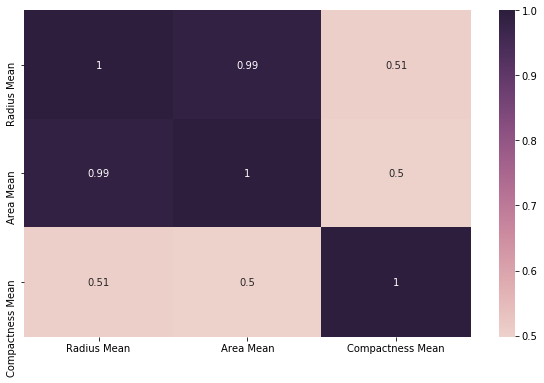

In [6]:
#korelasyon hesaplamasının gerçekleştirilmesi
print(df.corr())
print('\n','*'*100)

#Gerçekleştirilen hesaplamaya ait ısı haritasının oluşturulması
h_labels = [x.replace('_', ' ').title() 

for x in list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(
df.corr(), 
annot=True, 
xticklabels=h_labels, 
yticklabels=h_labels, 
cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

Öncelikle elimizde bulunan üç kolona ait verilerin birbirleriyle olan korelasyonlarını incelediğimizde <b>yarıçap (radius_mean)</b> ile <b>alan (area_mean)</b> arasında pozitif, güçlüdür. Bunu yarıçap ile alan korelasyon değerinin 0.987 olmasından anlayabiliyoruz. <b>Yarıçap</b> ile <b>yoğunluk (compactness_mean)</b> arasındaki ilişki, <b>alan</b> ile <b>yoğunluk</b> arasındaki ilişkiye fazlasıyla benzerdir ve bu ilişkiler tam olarak 1 ile 0 arasında yer almaktadır. Bunlar arasındaki ilişki, <b>yarıçap</b> ile <b>alan</b> arasındaki korelasyon kadar pozitif, güçlü değildir fakat yine de negatif ya da sıfır değerine de sahip değildir. Bu üç değer arasında genel olarak pozitif korelasyon olduğunu görebiliyoruz.

In [7]:
#Her bir kolonun birbirleriyle ayrı olarak kovaryans hesaplamalarının gerçekleştirimi
print("Yarıçap ile Alan arasındaki kovaryans :", df.radius_mean.cov(df.area_mean))
print("Yarıçap ile Yoğunluk arasındaki kovaryans :", df.radius_mean.cov(df.compactness_mean))
print("Alan ile Yoğunluk arasındaki kovaryans :", df.area_mean.cov(df.compactness_mean))

Yarıçap ile Alan arasındaki kovaryans : 1224.4834093464567
Yarıçap ile Yoğunluk arasındaki kovaryans : 0.09419705682504517
Alan ile Yoğunluk arasındaki kovaryans : 9.264930788911855


Kovaryans kısaca iki değer arasındaki ilişkiyi göstermektedir. İki değerin birbirisiyle ilişkili olup olmadığını anlamanın en basit yollarından birisidir kovaryans hesabı. Cov(x,y) < 0 ise iki değer arasında zıt yönlü bir ilişki vardır, Cov(x,y) = 0 ise bu iki değişken arasında herhangi bir ilişki yoktur, Cov(x,y) > 0 ise değişlenler arasında aynı yönde bir ilişki var demektir. Fakat bu ilişkinin anlamlı olabilmesi için, değişkenlerin biriminin mantıklı olması gerekmektedir. Eğer iki değişken farklı birimleri ölçüyorsa (sıcaklık vs. km) kovaryansın değerinin yorumlanması zor olacaktır. Yukarıda yer alan verilerimizin birbirleriyle olan kovaryans değerlerini inceleyecek olursak:
* Yarıçap ile Alan arasında aynı yönlü ve çok kuvvetli bir ilişki var olduğunu anlıyoruz. Alanın değeri yarıçapa matematiksel olarak direkt bağlı olduğu için beklediğimiz değerin de zaten bu olduğunu anlıyoruz.
* Yarıçap ile yoğunluk arasındaki kovaryans değerini incelediğimizde ise sıfıra fazlasıyla yakın bir değer görüyoruz. Hücrenin yarı çapı ile yoğunluğu arasında neredeyse herhangi bir ilişki olmadığını, yarıçapın artması ya da azalması hücre yoğunluğunun artmasına ya da azalmasına, ya da tam tersi, bir etkisi olmadığını anlayabiliyoruz.
* Alan ile yoğunluk arasındaki kovaryans değeri de sıfıra çok uzak değildir. Yarıçap ile alan arasında çok kuvvetli ilişki olduğunu biliyorduk, yarıçap ile yoğunluk arasında bir ilişki olmadığını da fark ettik, dolayısıyla alan ile yoğunluk arasında da kuvvetli bir ilişki beklenemezdi. 

In [8]:
print("Yarıçap ile Alan arasındaki Pearson korelasyon katsayısı :", df.radius_mean.corr(df.area_mean, method='pearson'))
print("Yarıçap ile Yoğunluk arasıdaki Pearson korelasyon katsayısı :", df.radius_mean.corr(df.compactness_mean, method='pearson'))
print("Alan ile Yoğunluk arasıdaki Pearson korelasyon katsayısı :", df.area_mean.corr(df.compactness_mean, method='pearson'))

Yarıçap ile Alan arasındaki Pearson korelasyon katsayısı : 0.9873571700566123
Yarıçap ile Yoğunluk arasıdaki Pearson korelasyon katsayısı : 0.5061235775263634
Alan ile Yoğunluk arasıdaki Pearson korelasyon katsayısı : 0.49850168215241175


Person korelasyon katsayısı da, iki veri arasındaki ilişkiyi -1 ve +1 arasında konumlandırarak hesaplar. Bu katsayılar iki değişken arasındaki doğrusal ilişkiyi ölçer. Yukarıda verilerimiz arasında hesaplamış olduğumuz Pearson korelasyon katsayılarını inceleyecek olursak:
* Yarıçap ile Alan arasında yine beklenildiği gibi 1'e çok yakın, yani mükemmele yakın, bir doğrusal ilişki vardır. Zaten matematiksel olarak da beklentimiz bu yöndeydi.
* Yarıçap ile Yoğunluk arasındaki Person korelasyon katsayısı ise 0.5, bunun grafiğini çizmek istesek, x eksenine paralel bir doğrumuz olurdu diyebiliriz. Yarıçap ile yoğunluk arasındaki bu ilişki katsayısının benzerinin alan ile yoğunluk arasında da olması kaçınılamazdır, alan ile yarıçap arasındaki katsayıyı düşündüğümüzde.

In [9]:
print("Spearman Sıra Katsayıları")
print("-"*50)
print("Yarıçap - Alan     :", stats.spearmanr(df.radius_mean, df.area_mean))
print("Yarıçap - Yoğunluk :", stats.spearmanr(df.radius_mean, df.compactness_mean))
print("Alan - Yoğunluk    :", stats.spearmanr(df.area_mean, df.compactness_mean))

Spearman Sıra Katsayıları
--------------------------------------------------
Yarıçap - Alan     : SpearmanrResult(correlation=0.9996020278067481, pvalue=0.0)
Yarıçap - Yoğunluk : SpearmanrResult(correlation=0.49757760995795647, pvalue=6.3349241442214955e-37)
Alan - Yoğunluk    : SpearmanrResult(correlation=0.4889883974982949, pvalue=1.5419515156000542e-35)


In [10]:
def cohend(data1, data2):
    #sample'ların sayısı
    x1, x2 = len(data1), len(data2)
    
    #Sample'ların varyansının hesaplanması
    y1, y2 = np.var(data1, ddof=1), np.var(data2, ddof=1)

    #Havuzlanmış standart sapmanın hesaplanması
    s = sqrt(((x1 - 1) * y1 + (x2 - 1) * y2) / (x1 + x2 - 2))

    #Sample'ların ortalamasının hesaplanması
    z1, z2 = np.mean(data1), np.mean(data2)

    return (z1- z2) / s

print("Effect Size Değerleri (Cohen's d)")
print('-'*45)
print(f'Yarıçap ile Alan     : {cohend(df.radius_mean, df.area_mean)}')
print(f'Yarıçap ile Yoğunluk : {cohend(df.radius_mean, df.compactness_mean)}')
print(f'Alan ile Yoğunluk    : {cohend(df.area_mean, df.compactness_mean)}')

Effect Size Değerleri (Cohen's d)
---------------------------------------------
Yarıçap ile Alan     : -2.574857153581396
Yarıçap ile Yoğunluk : 5.62682911222856
Alan ile Yoğunluk    : 2.631339308769588


Etki değeri aralarında fark olmasını beklediğimiz gruplar arasındaki farkın büyüklüğünü gösteren istatistiksel değerdir. Farklı etki değeri hesaplama yöntemleri vardır ve bu ödevde kullanılan yöntem ise Cohen's d yöntemidir. Cohen genel bir öneri olmak üzere, d değerinin 0.2'den küçük olması durumunda etki büyüklüğü zayıf, 0.5 olması durumunda orta ve 0.8'den büyük olması durumunda ise kuvvetli olarak tanımlanabileceğini söylemektedir. Bunları dikkate alarak:
* Yarıçap ile Alan arasındaki etki değeri yukarda gözüktüğü üzere yaklaşık -2.57'dir. Bu da etki değeri zayıf olan 0.2'den fazlasıyla küçüktür. Bu da demek oluyor ki yarıçap ile alan değerleri için daha büyük bir örneklem büyüklüğü gerekliliği vardır.
* Yarıçap ile Yoğunluk ve Alan ile Yoğunluk arasındaki etki büyüklükleri de bir hayli fazladır. Bu ilişkiler arasındaki ilişkinin falasıyla kuvvetli olduğunu göstermektedir.

# <b> Soru 4 </b>
### <b> Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım. </b>

## <b> 1. 11 Eylül </b>

11 Eylül olaylarının yaşandığı günün sabahında, Manhattan'daki İkiz Kuleler'e uçaklı bir terör saldırısı gerçekleştirilmesine, bir çok insan neredeyse hiç ihtimal vermezdi. Fakat ilk uçağın çarpması sonucunda herkes bir terör saldırısı olabileceği ihtimali üzerine düşündü ve ardından ikinci uçağın çarpması ile birlikte ihtimaller yerini kesin düşüncelere bıraktı. Peki Bayes Teoremi ile bu sonuçlar üretilebilir mi?

Diyelim ki, ilk uçak çarpmadan önce Manhattan'da bir gökdelene bir terör saldırısı olma ihtimali 20.000'de 1 yani yüzde 0.005 olsun. Fakat, bir uçağın kaza ile Dünya Ticaret Merkezi'ne çarpmasına çok daha küçük bir olasılık tayin etmek gerekir ve bu ihtimalde deneysel olarak hesaplanabilir. 11 Eylül tarihine kadar Manhattan üzerinde uçuş yapılan her 25.000 günde sadece iki uçak kazası yaşandı. Bu istatistikten çıkan sonuç ise herhangi bir günde uçak kazası gerçekleşme ihtimali 12.500'de 1'dir. Bu rakamları Bayes Teoremine uygularsak, ilk uçağın çarpma anının ardından, bunun bir terör saldırısı olma ihtimali %0.005'ten %38'e yükselir.

#### <b> ÖNSEL OLASILIK </b>
Teröristlerin Manhattan gökdelenlerine uçakla çarpmalarına verdiğimiz başlangıç olasılığı -- x -- %0.005
#### <b> YENİ BİR OLAY MEYDANA GELİR: İLK UÇAK ÇARPAR </b>
Teröristler Manhattan gökdelenlerine saldırıyorlarsa, uçağın çarpma olasılığı -- y -- %100           
Teröristler Manhattan gökdelenlerine saldrımıyorlarsa, uçağın çarpma olasılığı (yani bir kaza) -- z -- %0.008
#### <b> SONSAL OLASILIK </b>
İlk uçağın çarptığı göz önüne alındığında, terör saldırısı olasılığının gözden geçirilmiş hesaplaması -- xy / (xy + z(1-x)) -- %38

Bayes Teoremi'nin temelinde, olasılık hesaplamalarımızı yalnızca bir kere güncelleyebileceğimiz fikri yoktur. Aksine, önümüze çıkan her yeni bulgu ile birlikte devamlı olarak güncelleyebiliriz. Böylece ilk uçağın çarpması sonucunda sonsal olasılığımız olan %38, ikinci uçağın çarpma ihtimali için bizim önsel olasılığımız olacaktır. Bu şekilde ikinci uçağın çarpma ihtimali için yukardaki işlemleri gerçekleştirdiğimizde, Dünya Ticaret Merkezine saldırı olması ihtimali %99 olur. Neredeyse kesin. New York'da bir sabah kaza yaşanması ihtimali bir o kadar olasılık dışıyken, ikinci bir kazanın olması imkansızdı... 

## <b> 2. Alan Turing - Enigma </b>

Enigma, Almanlar tarafından üretilen ve "kırılamaz" olarak kabul edilen bir şifreleme sistemidir. Makinanın şifre üretmek için kullandığı kodlama sistemi her gün Alman ordusu tarafından değiştiriliyordu. Bu şekilde Almanlar'dan başka kimse, hangi kodlama sisteminin kullanıldığını bilmiyordu. Makinanın kendisi de zaten rastgele gibi gözüken bir şifreleme mekanizmasına dayanmaktaydı. Şifreleme sisteminin her gün değiştiriliyor olması, şifre kırıcı ekiplerin makinanın çalışma mantığını kırmak için yalnıza 24 saatlerinin olmasına neden oluyordu. Turing, bir Enigma mesajındaki harfleri tahmin etmesine, olasılıkları hesaplamasına ve yeni mesaj geldikçe daha fazla ipucu eklemesine olanak tanıyan Bayes teorisine dayalı bir sistem geliştirdi. Bu yöntemle test edilecek tekerlek ayarlarının sayısını azaltabildi ve bu da onun şifreleri kırmasına yardımcı oldu.


## <b> 3. Aldatılma

Varsayalım ki partnerinizle aynı evde yaşıyorsunuz ve bir iş gezisinden evinize döndüğünüzde dolabınızın çekmecesinde yabancı bir iç çamaşırı buldunuz. Kendinize sorduğunuz soru muhtemelen şu olur: 'Partnerimin beni aldatma olasılığı nedir?'. Burada koşul, iç çamaşırı bulmuş olmanız; değerlendirmek istenilen hipotez ise, aldatılıyor olma olasılığınız. Bayes teoremi bu türden bir soruya cevap verebilir, şu üç niceliği cevaplamak şartıyla:

1. İlk olarak, iç çamaşırınının ortaya çıkışının, hipotezinizin doğru olduğunun, yani aldatıldığınızın, bir şartı olması olasılığının hesaplanması gerekmektedir. Varsayalım ki, bu problemde siz bir kadınsınız ve partneriniz bir erkek. Eğer sizi aldatıyorsa, iç çamaşırının oraya nasıl girdiğini hayal etmel zor olmayacaktır. Ama eğer aldatıyorsa da, ondan daha dikkatli olmasını beklersiniz. Sizi aldatma olasılığına bağlı olarak, iç çamaşırının ortaya çıkma olasılığına %50 diyelim.

2. İkinci olarak, hipotezinizin yanlış olması koşuluna bağlı olarak, iç çamaşırının ortaya çıkması olasılığını hesaplamak gerekiyor. Eğer sizi aldatmıyorsa, onların oraya nasıl girdiğini açıklayabilicek herhangi bir masum açıklama var mı? Her ne kadar bazıları hoş olmasa da (onun olabilir) var. Valizi bir başkasınınkiyle karıştımış olabilir, sizin güveninizi kazanmış bir kadın arkadaşı gece sizde kalmış olabilir. Size aldığı ve paketlemeyi unuttuğu bir hediye olabilir. Bu teoriler ne kadar kötü mazeretler olsa da hiçbiri özünde savunulamaz değillerdir. Bir bütün olarak bunların olasılığına %5 diyelim. 

3. Üçüncüsü ve en öenmlisi, Bayesyenlerin önsel olasılık diye adlandırdıkları şeye ihtiyaç vardır. İç çamaşırını bulmadan önce, partnerinizin sizi aldatmasına verdiğiniz ihtimal nedir? Tabii ki iç çamaşırını bulduktan sonra bu soruya nesnel cevap vermek imkansıza yakındır. Fakat bazen, bu tarz bir rakamı, deneysel bir şekilde hesaplamak mümkündür. Araştırmalara göre evli çiftlerin yüzde 4'ü, herhangi bir yılda eşlerini aldattıklarını gösteriyor, biz de bunu önsel olasılık olarak kullanabiliriz.

#### <b> ÖNSEL OLASILIK</b>
Başlangıçta, sizi aldatmasına verilen ihtimal  -- x -- %4
#### <b> YENİ BİR OLAY MEYDANA GELİR: GİZEMLİ BİR İÇ ÇAMAŞIRI BULUNDU </b>
Sizi aldatıyor olması koşuluyla iç çamaşırının ortaya çıkma ihtimali  -- y -- %50         
Sizi aldatmıyorsa iç çamaşırının ortaya çıkma ihtimali  -- %5 --
#### <b> SONSAL OLASILIK </b>
İç çamaşırının bulunması göz önüne alındığında, sizi aldatıyor olmasının ne kadar olası olduğunun hesaplaması -- xy / (xy + z(1-x)) -- %29

Görüldüğü üzere olasılık hala epey düşük: %29. Bu değer, iç çamaşırını bulmak suçlamak için yeterince yeterli bir sebepken mantığa aykırı gelebilir. Fakat bu çoğunlukla, onun sizi aldatması için belirlediğiniz önsel olasılığın düşük olmasından kaynaklanıyor. Masum bir adamın iç çamaşırının ortaya çıkışıyla ilgili suçlu bir adamdan daha az akla yatkın açıklaması olmasına dayanarak, onun masum bir adam olduğunu düşünmeye başlıyorsunuz ve eşitlikte bu durum ağır basıyor.

## <b> 4. Mamogram </b>

Önsel olasılıklar yüksek olduğunda, yeni bulgulara karşı şaşırtıcı bir şekilde direnç gösterebiliyorlar. Kırklı yaşlardaki kadınlarda mem kanseri görülmesi ihtimali epey düşüktür, yüzde 1.4 civarındadır. Fakat mamogram sonucu pozitifse bu olasılık ne olur? Araştırmalara göre, meme kanseri olmayan kadınlarda mamogram sonucunun pozitif çıkma olasılığı yaklaşık yüzde 10'dur. Mamogram ise meme kanseri olanların yaklaşık %75'ini tespit edebiliyor. Bu istatistiklere baktığımızda, mamogramın pozitif çıkması epey kötü bir haber gibi gözüküyor. Fakat Bayes Teoremi'ni bu rakamlara uyguladığımızda, farklı bir sonuçla karşılaşılıyor: Pozitif mamogram sonucuna sahip olan kırklı yaşlarda bir kadının meme kanseri olma ihtimali hala yüzde 10. Bu yalancı pozitifler eşitliğine hakim oluyor, çünkü çok az sayıda genç kadında meme kanseri tespit ediliyor. Bu nedenle bir çok doktor, kadınlara düzenli mamogram çekimlerine ellilerinde ve meme kanseri olmalarının önsel olasılığı yüksekken başlamalarını tavsiye ediyor.

## <b> 5. Alkolik </b>

Alkolik olan birisinin karaciğer hastası olma olasılığını Bayes Teoremi ile hesaplayabiliriz. A değeri, hastanın karaciğer hastalığı var anlamına gelsin. Geçmiş veriler incelendiğinde, kliniğe giren hastaların yüzde 10'unun karaciğer hastalığı olduğunu görüyoruz. Bu durumda P(A) değeri 0.10'a eşit olur. B değeri, hastanın alkolik olduğu anlamına gelsin. Kliniğe giren hastaların yüzde 5'i alkolik olduğuna göre P(B) değeri 0.05'e eşit olur. Karaciğer hastalığı teşhisi konulan hastaların yüzde 7'si alokil olduğuna göre, P(B|A) değerimiz 0.07'ye eşit olur.
Bayes Teorimi bize:
P(A|B) = (0.07*0.1)/0.05 = 0.14
sonucunu verir. Bu da demek oluyor ki, kliniğe gelen hasta alkolik ise karaciğer hastalığının olma ihtimali 0.14'tür.

# <b> Soru 5 </b>
### <b> Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.(Araştırma Ödevi) </b>

<img src="distribution.png">